<a href="https://colab.research.google.com/github/Ameliafauziah/Waste_Management_Analysis/blob/main/Waste_Management_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [58]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

energy_saved = pd.read_csv('/waste_energy_stat.csv')
waste_03_17 = pd.read_csv('/2003_2017_waste.csv')
waste_18_20 = pd.read_csv('/2018_2020_waste.csv')

# Cleaning Data

1. Data Cleaning

In [59]:
energy_saved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                               --------------  ----- 
 0   The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type  4 non-null      object
 1   Unnamed: 1                                                                                                                                                           3 non-null      object
 2   Unnamed: 2                                                                                                                 

In [60]:
energy_saved

,The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1 barrel oil is approximately 159 litres of oil,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,material,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
3,energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4100 kWh
4,crude_oil saved,16 barrels,0.12 barrels,1.8 barrels,40 barrels,11 barrels



*   Transpose
*   Removed first two columns and first row
*   Resetting index
*   Renaming the columns

As you can see, we have three columns, material, energy_saved, and crude_oil_saved.



In [61]:
clean_energy_saved = (
    energy_saved.T.iloc[1:, 2:]
    .reset_index(drop=True)
    .rename(columns={2: "material", 3: "energy_saved", 4: "crude_oil_saved"})
)
clean_energy_saved

,material,energy_saved,crude_oil_saved
0,Plastic,5774 Kwh,16 barrels
1,Glass,42 Kwh,0.12 barrels
2,Ferrous Metal,642 Kwh,1.8 barrels
3,Non-Ferrous Metal,14000 Kwh,40 barrels
4,Paper,4100 kWh,11 barrels


In [62]:
waste_03_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    float64
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.7+ KB


In [63]:
waste_03_17.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [64]:
waste_18_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Waste Type                     45 non-null     object
 1   Total Generated ('000 tonnes)  45 non-null     int64 
 2   Total Recycled ('000 tonnes)   45 non-null     int64 
 3   Year                           45 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ KB


In [65]:
waste_18_20.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,126,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018


In [66]:
waste_18_20.iloc[19,1]=744
waste_18_20.iloc[1,2]=1260

2. Data Merging

In [67]:
print(waste_18_20.columns)

Index(['Waste Type', 'Total Generated ('000 tonnes)',
       'Total Recycled ('000 tonnes)', 'Year'],
      dtype='object')


In [68]:
waste_18_20.columns = (
    waste_18_20.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w\s]", "", regex=True)
)
waste_18_20 = waste_18_20.rename(columns={
    'total_generated_000_tonnes': 'total_waste_generated_tonne',
    'total_recycled_000_tonnes': 'total_waste_recycled_tonne'
})

In [69]:
waste_18_20['total_waste_generated_tonne']=waste_18_20['total_waste_generated_tonne']*1000
waste_18_20['total_waste_recycled_tonne']=waste_18_20['total_waste_recycled_tonne']*1000
waste_18_20['recycling_rate']=waste_18_20['total_waste_recycled_tonne']/waste_18_20['total_waste_generated_tonne']

In [70]:
waste_18_20['recycling_rate']=waste_18_20['recycling_rate'].round(2)

In [71]:
waste_18_20.head()

,waste_type,total_waste_generated_tonne,total_waste_recycled_tonne,year,recycling_rate
0,Construction& Demolition,1624000,1618000,2018,1.00
1,Ferrous Metal,1269000,1260000,2018,0.99
2,Paper/Cardboard,1054000,586000,2018,0.56
3,Plastics,949000,41000,2018,0.04
4,Food,763000,126000,2018,0.17


In [72]:
waste_18_20 = waste_18_20.reindex(columns=['waste_type','total_waste_recycled_tonne','total_waste_generated_tonne','recycling_rate','year'])

In [73]:
waste_18_20.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Construction& Demolition,1618000,1624000,1.00,2018
1,Ferrous Metal,1260000,1269000,0.99,2018
2,Paper/Cardboard,586000,1054000,0.56,2018
3,Plastics,41000,949000,0.04,2018
4,Food,126000,763000,0.17,2018


In [74]:
waste_03_17=waste_03_17.drop('waste_disposed_of_tonne',axis=1)
waste_03_17.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,111100.0,791000,0.14,2016
1,Paper/Cardboard,607100.0,1183100,0.51,2016
2,Plastics,59500.0,822200,0.07,2016
3,C&D,1585700.0,1595400,0.99,2016
4,Horticultural waste,209000.0,320500,0.65,2016


In [75]:
df=pd.concat([waste_03_17, waste_18_20])

3.The value cleaning of column 'waste_type'

In [76]:
df['waste_type'].unique()

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural waste', 'Wood', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others (stones, ceramics & rubber etc.)', 'Total',
       'Others (stones, ceramics & rubber etc)', 'Food waste',
       'Construction Debris', 'Wood/Timber', 'Horticultural Waste',
       'Ferrous Metal', 'Non-ferrous Metals', 'Used Slag', 'Sludge',
       'Scrap Tyres', 'Ferrous Metals', 'Others', 'Construction debris',
       'Non-ferrous metals', 'Ash and sludge', 'Plastic',
       'Others (stones, ceramic, rubber, etc.)',
       'Construction& Demolition', 'Horticultural', 'Non-Ferrous Metal',
       'Others (stones, ceramic, rubber, ect)', 'Overall',
       'Construction & Demolition', 'Ash & sludge',
       'Others (stones, ceramics, etc.)'], dtype=object)

In [77]:
df['waste_type']=df['waste_type'].str.lower()
df['waste_type'].value_counts()

,count
waste_type,
paper/cardboard,18
textile/leather,18
glass,18
used slag,18
scrap tyres,18
plastics,17
horticultural waste,15
total,15
ferrous metal,14


In [78]:
df=df.replace('plastic','plastics')
df=df.replace('overall','total')
df=df.replace('horticultural','horticultural waste')
df=df.replace('ferrous metal','ferrous metals')
df=df.replace('non-ferrous metal','non-ferrous metals')
df=df.replace(['construction& demolition','construction & demolition','c&d'],'construction debris')
df=df.replace(['others (stones, ceramic, rubber, ect)','others (stones, ceramics, etc.)','others',
               'others (stones, ceramic, rubber, etc.)','others (stones, ceramics & rubber etc.)'],'others (stones, ceramics & rubber etc)')
df=df.replace('food waste','food')
df=df.replace('wood','wood/timber')
df=df.replace(['ash & sludge','sludge'],'ash and sludge')

In [79]:
df['waste_type'].value_counts()

,count
waste_type,
food,18
paper/cardboard,18
plastics,18
construction debris,18
horticultural waste,18
wood/timber,18
ferrous metals,18
non-ferrous metals,18
used slag,18


# Data Analysis and Visualization

Firstly, I analyzed the time series trends of total waste generated, total recycled waste, and the recycling rate, as well as the distribution of total waste generated across different waste types to understand overall waste management performance.

Subsequently, I explored the trends and quantities of energy and oil savings associated with different waste types to evaluate the environmental benefits of recycling efforts.

Finally, I conducted a focused analysis on selected waste types to examine the time series trends of waste generation, recycling, and recycling rates, aiming to extract deeper insights into specific waste streams.

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

In [81]:
df_total=df[df['waste_type']=='total']

In [82]:
df_total= df_total.sort_values('year')
df_total.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
209,total,2223200.0,4728200,0.47,2003
194,total,2307100.0,4789700,0.48,2004
179,total,2469400.0,5018200,0.49,2005
164,total,2656900.0,5220500,0.51,2006
149,total,3034800.0,5600800,0.54,2007


In [83]:
df_total.dtypes

,0
waste_type,object
total_waste_recycled_tonne,float64
total_waste_generated_tonne,int64
recycling_rate,float64
year,int64


1) Time series trend of 'total waste generated', 'total recycle generated' and 'recycling rate'

In [84]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['total_waste_generated_tonne'],
        name='Waste Generated',
        marker_color='indianred'
    ),
    secondary_y=False
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['total_waste_recycled_tonne'],
        name='Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_total['year'],
        y=df_total['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Singapore Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

fig.show()

2)The time series trend of 'waste generated', 'recycle generated' and 'recycling rate' by some 'waste_types'

In [111]:
df_metal=df[df['waste_type']=='ferrous metals'].sort_values('year')
df_const=df[df['waste_type']=='construction debris'].sort_values('year')
df_food=df[df['waste_type']=='food'].sort_values('year')
df_paper=df[df['waste_type']=='paper/cardboard'].sort_values('year')
df_plastic=df[df['waste_type']=='plastics'].sort_values('year')
df_nometal=df[df['waste_type']=='non-ferrous metals'].sort_values('year')
df_glass=df[df['waste_type']=='glass'].sort_values('year')

In [98]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_metal['year'],
        y=df_metal['total_waste_generated_tonne'],
        name='Metal Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled (set color to green)
fig.add_trace(
    go.Bar(
        x=df_metal['year'],
        y=df_metal['total_waste_recycled_tonne'],
        name='Metal Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_metal['year'],
        y=df_metal['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Metal Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()


In [101]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_const['year'],
        y=df_const['total_waste_generated_tonne'],
        name='Construction Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_const['year'],
        y=df_const['total_waste_recycled_tonne'],
        name='Construction Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_const['year'],
        y=df_const['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Construction Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()


In [109]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_food['year'],
        y=df_food['total_waste_generated_tonne'],
        name='Food Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_food['year'],
        y=df_food['total_waste_recycled_tonne'],
        name='Food Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_food['year'],
        y=df_food['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Food Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()


In [113]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_paper['year'],
        y=df_paper['total_waste_generated_tonne'],
        name='Paper Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_paper['year'],
        y=df_paper['total_waste_recycled_tonne'],
        name='Paper Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_paper['year'],
        y=df_paper['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Paper Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()


In [115]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_plastic['year'],
        y=df_plastic['total_waste_generated_tonne'],
        name='Plastic Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_plastic['year'],
        y=df_plastic['total_waste_recycled_tonne'],
        name='Plastic Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_plastic['year'],
        y=df_plastic['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Plastic Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()

In [116]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_nometal['year'],
        y=df_nometal['total_waste_generated_tonne'],
        name='Nonmetal Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_nometal['year'],
        y=df_nometal['total_waste_recycled_tonne'],
        name='Nonmetal Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_nometal['year'],
        y=df_nometal['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Non-Metal Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()

In [117]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar for Waste Generated
fig.add_trace(
    go.Bar(
        x=df_glass['year'],
        y=df_glass['total_waste_generated_tonne'],
        name='Glass Waste Generated',
        marker_color='indianred'
    )
)

# Add bar for Waste Recycled
fig.add_trace(
    go.Bar(
        x=df_glass['year'],
        y=df_glass['total_waste_recycled_tonne'],
        name='Glass Waste Recycled',
        marker_color='seagreen'
    ),
    secondary_y=False
)

# Add line for Recycling Rate
fig.add_trace(
    go.Scatter(
        x=df_glass['year'],
        y=df_glass['recycling_rate'],
        name='Recycling Rate',
        mode='lines+markers',
        line=dict(color='royalblue', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Glass Waste Management Trends Over Time',
    xaxis_title='Year',
    yaxis_title='Waste (tonnes)',
    yaxis2_title='Recycling Rate',
    barmode='group',
    template='plotly_white'
)

# Display the plot
fig.show()

3)The portion of 'total_waste_generated_tonne' by 'waste_type'

Text(0.5, 1.0, 'Proportion of Total Waste Generated by Waste Type')

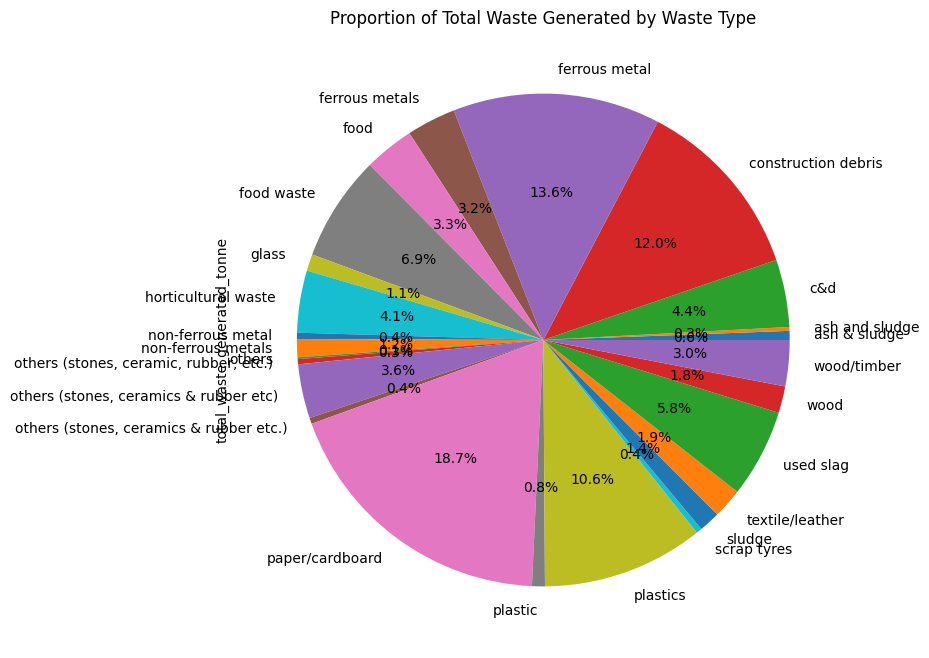

In [20]:
df1 = df[df['waste_type'] != 'total']
df1.groupby('waste_type')['total_waste_generated_tonne'].sum().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%'
).set_title('Proportion of Total Waste Generated by Waste Type')

4)Calcurate the amount of 'energy_saving_amount' and 'oil_saving_amount'

In [27]:
df_energy_save=df[df['waste_type'].isin(['plastics','glass','ferrous metals','non-ferrous metals','paper/cardboard'])]
df_energy_save.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
1,paper/cardboard,576000.0,607100.0,1183100.0,0.51,2016.0
2,plastics,762700.0,59500.0,822200.0,0.07,2016.0
10,glass,57600.0,14700.0,72300.0,0.20,2016.0
16,paper/cardboard,588500.0,603700.0,1192200.0,0.51,2015.0
17,plastics,766800.0,57800.0,824600.0,0.07,2015.0


In [28]:
def energy_save(ex):
    if ex=='paper/cardboard':
        return 4100
    elif ex=='plastics':
        return 5774
    elif ex=='ferrous metals':
        return 642
    elif ex=='non-ferrous metals':
        return 14000
    else:
        return 42

In [29]:
def oil_saving(ex):
    if ex=='paper/cardboard':
        return 11*159
    elif ex=='plastics':
        return 16*159
    elif ex=='ferrous metals':
        return 1.8*159
    elif ex=='non-ferrous metals':
        return 40*159
    else:
        return 0.12*159

In [ ]:
df_energy_save['energy_saving']=df_energy_save['waste_type'].apply(energy_save)
df_energy_save['oil_saving']=df_energy_save['waste_type'].apply(oil_saving)
df_energy_save['energy_saving_amount']=df_energy_save['total_waste_recycled_tonne']*df_energy_save['energy_saving']
df_energy_save['oil_saving_amount']=df_energy_save['total_waste_recycled_tonne']*df_energy_save['oil_saving']

In [32]:
df_energy_save.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,energy_saving,oil_saving,energy_saving_amount,oil_saving_amount
1,paper/cardboard,576000.0,607100.0,1183100.0,0.51,2016.0,4100,1749.00,2.489110e+09,1.061818e+09
2,plastics,762700.0,59500.0,822200.0,0.07,2016.0,5774,2544.00,3.435530e+08,1.513680e+08
10,glass,57600.0,14700.0,72300.0,0.20,2016.0,42,19.08,6.174000e+05,2.804760e+05
16,paper/cardboard,588500.0,603700.0,1192200.0,0.51,2015.0,4100,1749.00,2.475170e+09,1.055871e+09
17,plastics,766800.0,57800.0,824600.0,0.07,2015.0,5774,2544.00,3.337372e+08,1.470432e+08


5)The time series trend of 'energy_saving_amount' and 'oil_saving_amount' by 'waste_type'

In [45]:
fig = px.bar(df_energy_save, x="year", y="energy_saving_amount", color="waste_type", title="energy_saving_amount")
fig.show()

In [34]:
fig = px.bar(df_energy_save, x="year", y="oil_saving_amount", color="waste_type", title="oil_saving_amount")
fig.show()

Paper/Cardboard and non-ferrous metals contribute significantly to energy and oil savings due to the high amount of energy (in kilowatt-hours) and crude oil (in barrels) conserved when 1 metric tonne (1,000 kilograms) of these materials is recycled. These waste types offer greater environmental benefits compared to others, making their recycling particularly impactful.

6)**Energy saved per year**
its time to calculate energy saved every year from *2003* to *2020* based on five waste types, **plastics, paper, glass, ferrous and non-ferrous metal.**

*   Group by per year
*   Summarize and extract total energy saved
*   Converting it into Pandas dataframe
*   Converting total_energy_savedfrom float to integer


In [124]:
import pandas as pd

# Step 1: Filter and copy relevant waste types
relevant_waste_types = ['plastics', 'paper/cardboard', 'glass', 'ferrous metals', 'non-ferrous metals']
df_energy = df[df['waste_type'].isin(relevant_waste_types)].copy()

# Step 2: Define energy saving factor in kWh per tonne
energy_factors = {
    'paper/cardboard': 4100,
    'plastics': 5774,
    'ferrous metals': 642,
    'non-ferrous metals': 14000,
    'glass': 42
}

# Step 3: Calculate energy saved per row (in kWh)
df_energy['energy_saved_kwh'] = df_energy.apply(
    lambda row: row['total_waste_recycled_tonne'] * energy_factors.get(row['waste_type'], 0),
    axis=1
)

# Step 4: Convert kWh to GWh
df_energy['energy_saved_gwh'] = df_energy['energy_saved_kwh'] / 1_000_000

# Step 5: Group by year and summarize total energy saved
energy_saved_per_year = df_energy.groupby('year')['energy_saved_gwh'].sum().reset_index()

# Step 6: Rename column for clarity
energy_saved_per_year.columns = ['year', 'total_energy_saved_gwh']

# Step 7: Convert total energy saved from float to integer
energy_saved_per_year['total_energy_saved_gwh'] = energy_saved_per_year['total_energy_saved_gwh'].round().astype(int)

# Optional: Show result
print(energy_saved_per_year)


    year  total_energy_saved_gwh
0   2003                    3712
1   2004                    3982
2   2005                    4239
3   2006                    4204
4   2007                    4458
5   2008                    4329
6   2009                    3886
7   2010                    5226
8   2011                    5773
9   2012                    5548
10  2013                    5787
11  2014                    5331
12  2015                    5911
13  2016                    5044
14  2017                    4803
15  2018                    5829
16  2019                    4606
17  2020                    3598
